In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## What is feature Selection?
### It's selecting some of the features,attributes, such that classifier performance is not affecetd.
## Why it is done?
### It's done so that model trains faster, model becomes simple



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
df=pd.read_csv("D:\ML Assignment\ML Assingment 8\winequality_white.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Intution of 1 way Anova which is tested using F Distribution is
* If there are three attributes a1,a2,a3 and classes C1,C2,C3
* if the means of the three class is far from each other than that is a good attribute, feature
* so if class means of a1 are (0.5,3.0,5.6) and a2 is (2,2.1,2.2) then a1 is a better feature
* This is formally measured by F Score and it is higher from a1 and a2

### Mean of the features

In [5]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


### Undestanding utitlity of a feature by a simple box plot

<AxesSubplot:title={'center':'volatile acidity'}, xlabel='quality'>

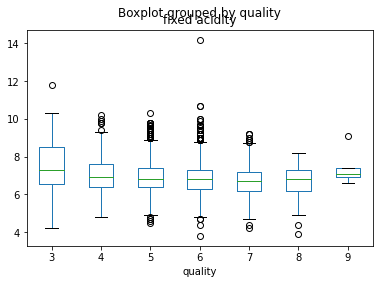

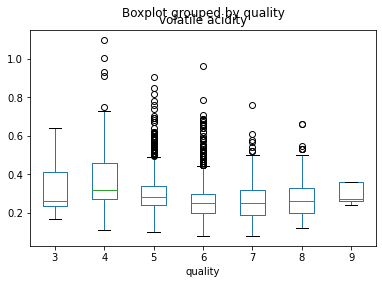

In [6]:
df.boxplot(column='fixed acidity', by='quality', grid=False)
df.boxplot(column='volatile acidity', by='quality', grid=False)

#### Regular splitting into train and test

In [7]:
y = df.iloc[:,11]
x = df.iloc[:,0:11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Selecting Features

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=4)
selector.fit(x_train, y_train)

SelectKBest(k=4)

#### Top Features

In [9]:
cols = selector.get_support(indices=True)
cols

array([ 1,  6,  7, 10], dtype=int64)

### Picking subset of training and testing

In [10]:
x_train_s = x_train.iloc[:,cols]
x_test_s = x_test.iloc[:,cols]

### Training decision tree with full features

In [11]:
from sklearn.tree import DecisionTreeClassifier
#Initalize the classifier
clf = DecisionTreeClassifier()
#Fitting the training data
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6193877551020408


### Training decision tree with selected features

In [13]:
#Fitting the training data
clf.fit(x_train_s, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test_s)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5806122448979592
